# Heart Failure Analysis

---



---



1. Introduction
2. Import Libraries
3. Load Dataset and Check Data
	* Data Understanding
	* Load Dataset
	* Outlier Detection
	* Check for Missing Values
4. Exploratory Data Analysis
5. Data Preparation
	* Data Splitting
	* Cross Validate Models
6. Modeling





# 1. Introduction

---






Heart failure (gagal jantung) adalah kondisi kronis dan progresif di mana otot jantung tidak mampu memompa cukup darah untuk memenuhi kebutuhan tubuh akan darah dan oksigen. Pada dasarnya, jantung tidak dapat mengimbangi beban kerjanya. Ada faktor-faktor tertentu yang meningkatkan kemungkinan gagal jantung. Ini bisa berupa faktor mental atau fisik.

Dalam analisa ini, akan mengklasifikasikan dengan feature engineering dan ensemble modeling. Pertama-tama akan menampilkan beberapa analisis fitur dan yang terakhir akan melakukan evaluasi dan prediksi model.

# 2. Import Libraries

---



In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns

# Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

import sklearn

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

# 3. Load Dataset and Check Data

---



## Data Understanding

* Dataset berisi daftar berbagai atribut prediksi kematian akibat heart failure (gagal ginjal). Dataset dapat di download pada tautan berikut : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
* Memberikan informasi seperti jumlah data, missing value, duplikasi data,
korelasi antar kolom, dan sebaran data.
* Melakukan data manipulation untuk mendapatkan variabel atau fitur baru
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

## Load Dataset

In [2]:
# Load dataset dan menampilkan 5 data teratas

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,67.00,0,410,0,55,1,250000.00,1.00,137,0,0,15,0
1,42.00,1,580,0,60,1,260000.00,1.80,133,1,1,200,0
2,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
3,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
4,61.00,0,750,0,55,0,230000.00,1.20,138,0,1,280,0


# **Informasi Kolom**

1. **age:** Usia pasien yang menderita gagal ginjal.
2. **anaemia:** Variabel biner (0 atau 1) yang menunjukkan apakah pasien menderita anemia (1) atau tidak (0).
3. **creatinine_phosphokinase:** Tingkat enzim kreatinin fosfokinase dalam darah pasien.
4. **diabetes:** Variabel biner yang menunjukkan apakah pasien menderita diabetes (1) atau tidak (0).
5. **ejection_fraction:** Persentase fraksi darah yang dipompa keluar dari ventrikel kiri saat detak jantung.
6. **high_blood_pressure:** Variabel biner yang menunjukkan apakah pasien memiliki tekanan darah tinggi (1) atau tidak (0).
7. **platelets:** Jumlah trombosit dalam darah pasien.
8. **serum_creatinine:** Tingkat kreatinin dalam darah pasien.
9. **serum_sodium:** Tingkat natrium dalam darah pasien.
10. **sex:** Jenis kelamin pasien (pria=1 atau wanita=0).
11. **smoking:** Variabel biner yang menunjukkan apakah pasien merokok (1) atau tidak (0).
12. **time:** Waktu pengamatan atau follow-up pasien dalam periode tertentu.
13. **DEATH_EVENT:** Variabel biner yang menunjukkan apakah pasien mengalami kematian (1) atau tidak (0). Atribut ini menjadi atribut target dalam analisis, di mana prediksi akan dilakukan untuk mengetahui faktor-faktor yang berkontribusi terhadap kematian pasien gagal ginjal.

## Outlier detection

Mendeteksi outlier dari daftar fitur yang diberikan. Ini mengembalikan daftar indeks menurut pengamatan yang mengandung lebih dari n outlier dengan metode Tukey


In [3]:
def detect_outliers(df,n,features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["age","anaemia","creatinine_phosphokinase","platelets", "serum_creatinine", "serum_sodium", "time"])

Tukey method adalah prosedur perbandingan berganda satu langkah dan uji statistik. Ini dapat digunakan untuk menemukan cara yang secara signifikan berbeda satu sama lain. Dapat mendeteksi outlier dari fitur nilai numerik (Age, anaemia, creatinine_phosphokinase etc). Kemudian, menganggap outlier sebagai baris yang memiliki setidaknya dua nilai numerik outlier.


In [4]:
# Menampilkan baris outlier
df.loc[outliers_to_drop]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
61,60.00,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1


Tidak ada yang mengandung lebih dari 2 outlier

## Properti Data

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.shape

(517, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       517 non-null    float64
 1   anaemia                   517 non-null    int64  
 2   creatinine_phosphokinase  517 non-null    int64  
 3   diabetes                  517 non-null    int64  
 4   ejection_fraction         517 non-null    int64  
 5   high_blood_pressure       517 non-null    int64  
 6   platelets                 517 non-null    float64
 7   serum_creatinine          517 non-null    float64
 8   serum_sodium              517 non-null    int64  
 9   sex                       517 non-null    int64  
 10  smoking                   517 non-null    int64  
 11  time                      517 non-null    int64  
 12  DEATH_EVENT               517 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 52.6 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00
mean,59.84,0.43,510.15,0.32,40.65,0.42,250510.74,1.29,136.43,0.56,0.32,138.26,0.32
std,11.57,0.50,750.42,0.47,12.66,0.49,79722.59,0.81,3.86,0.50,0.47,79.14,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,50.00,0.00,180.00,0.00,30.00,0.00,210000.00,0.90,135.00,0.00,0.00,76.00,0.00
50%,60.00,0.00,350.00,0.00,38.00,0.00,246000.00,1.10,137.00,1.00,0.00,121.00,0.00
75%,68.00,1.00,582.00,1.00,50.00,1.00,280000.00,1.40,139.00,1.00,1.00,205.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,290.00,1.00


##  Cek missing values

In [9]:
# Mencari kolom dengan nilai nol
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada nilai yang hilang

# 4. Exploratory Data Analysis

---



In [10]:
# Membedakan Data Numerical and Categorical

col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


In [11]:
# Mengubah age dan platelets menjadi integer
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)

df1 = df.copy(deep = True)

<Axes: >

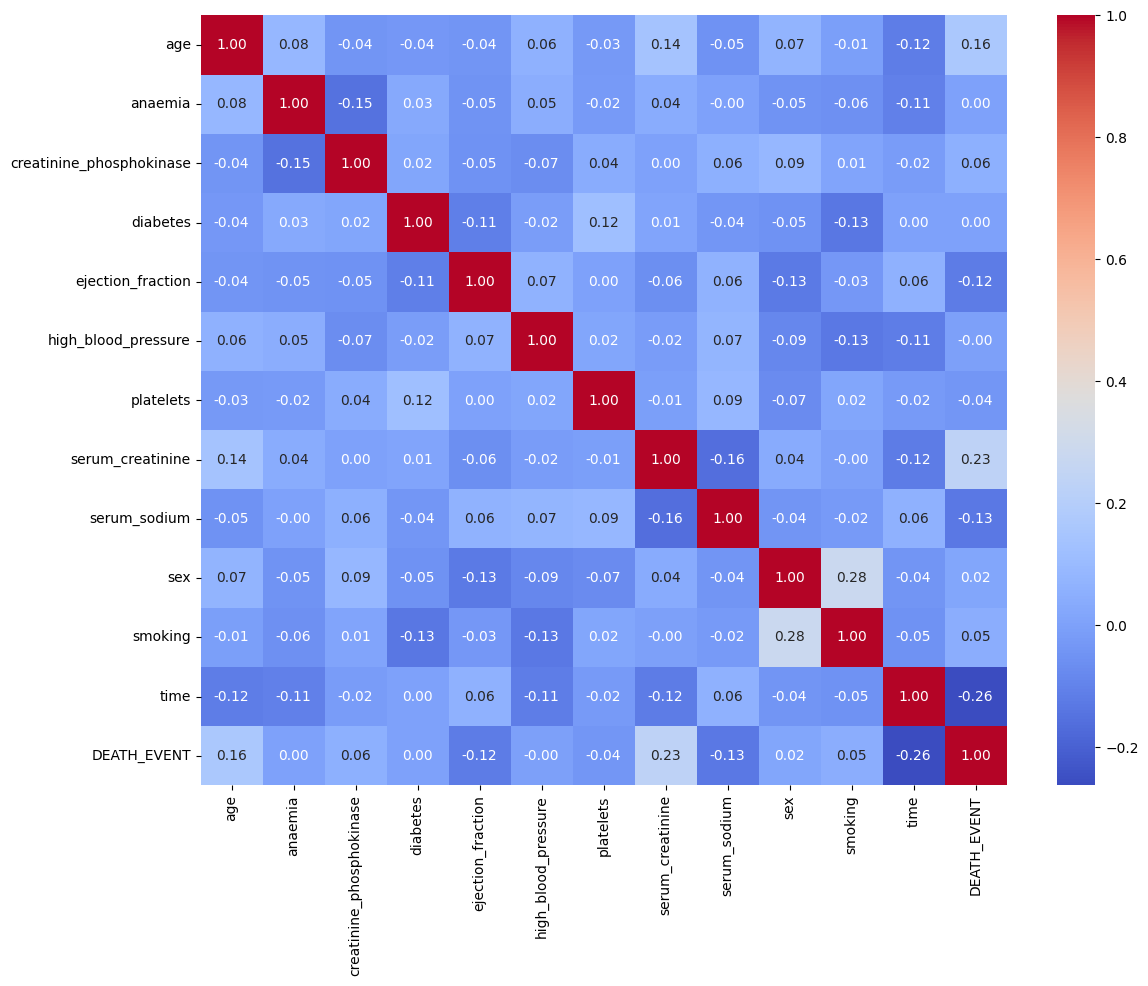

In [12]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

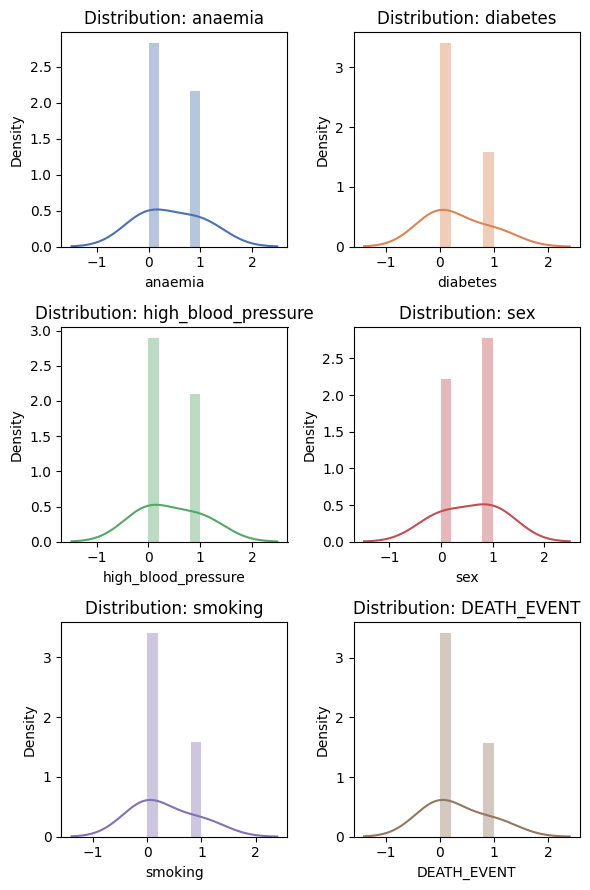

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 9))

color_palette = sns.color_palette('deep')

for i in range(len(categorical_features)):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=color_palette[i])
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

plt.tight_layout()
plt.show()


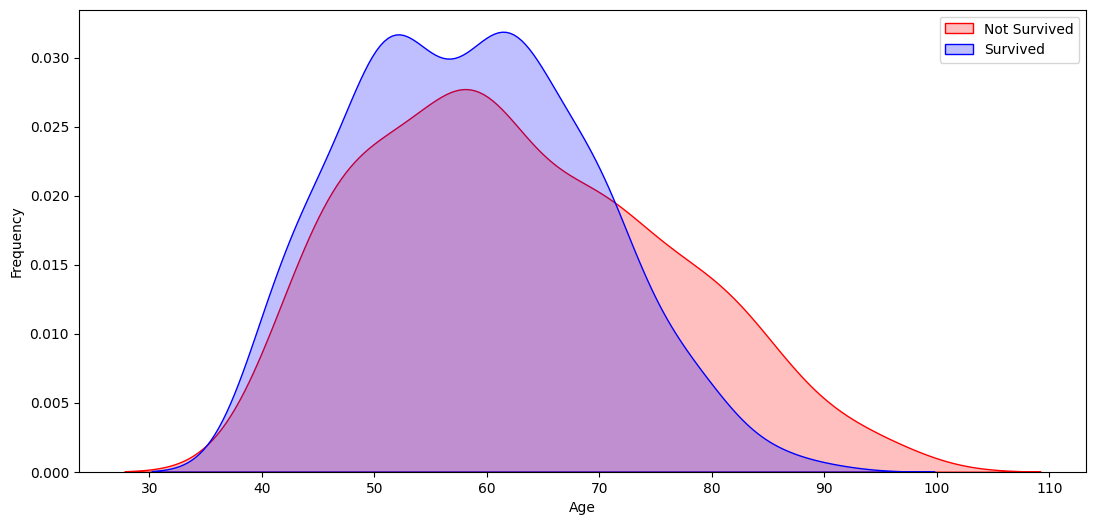

In [14]:
# Age vs DEATH_EVENT
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 0], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Not Survived","Survived"])


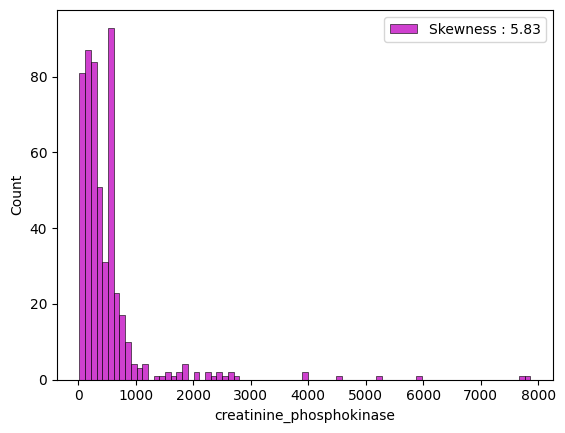

In [15]:
# Fare distribution creatinine_phosphokinase
g = sns.histplot(df["creatinine_phosphokinase"], color="m", label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
g = g.legend(loc="best")

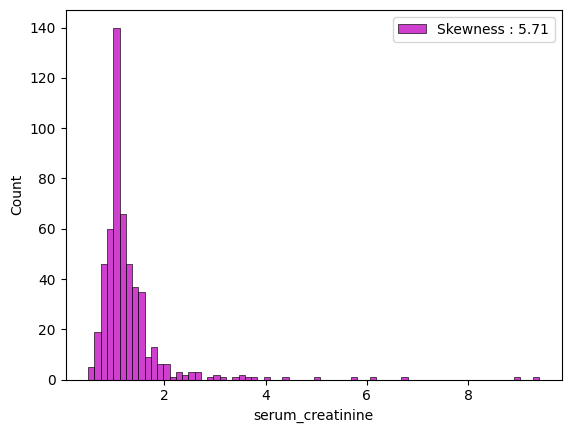

In [16]:
# Fare distribution serum_creatinine
g = sns.histplot(df["serum_creatinine"], color="m", label="Skewness : %.2f"%(df["serum_creatinine"].skew()))
g = g.legend(loc="best")

**Anaemia**

Text(0, 0.5, 'Probabilitas Bertahan Hidup')

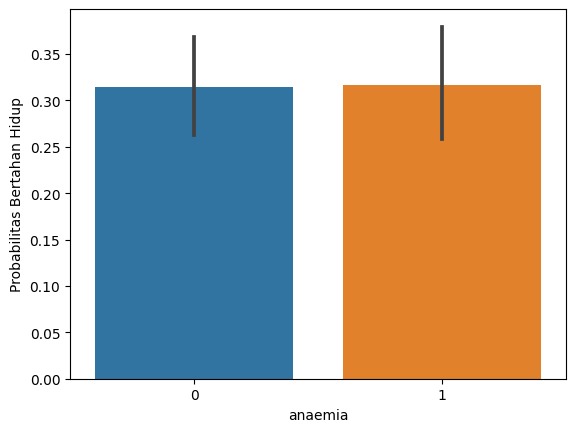

In [17]:
g = sns.barplot(x="anaemia",y="DEATH_EVENT",data=df)
g.set_ylabel("Probabilitas Bertahan Hidup")

**Sex**

Text(0, 0.5, 'Probabilitas Bertahan Hidup')

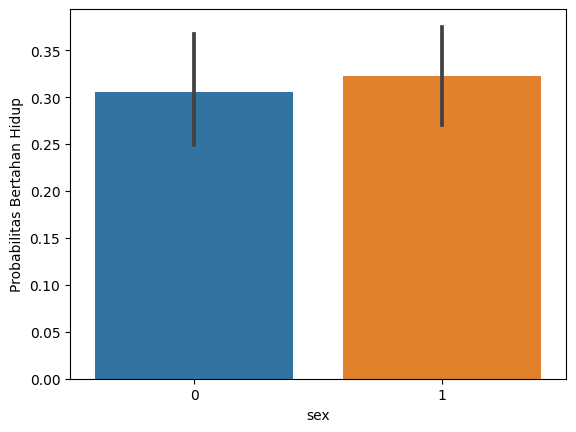

In [18]:
g = sns.barplot(x="sex",y="DEATH_EVENT",data=df)
g.set_ylabel("Probabilitas Bertahan Hidup")

In [19]:
df[["sex","DEATH_EVENT"]].groupby('sex').mean()

,DEATH_EVENT
sex,
0,0.31
1,0.32


Jenis kelamin pasien Laki-laki = 1, Perempuan = 0

Hasil analisis menunjukkan laki-laki dan perempuan keduanya memiliki peluang yang sama untuk bertahan hidup. Jadi Jenis Kelamin, mungkin tidak memainkan peran penting dalam prediksi kematian.

**Diabetes**

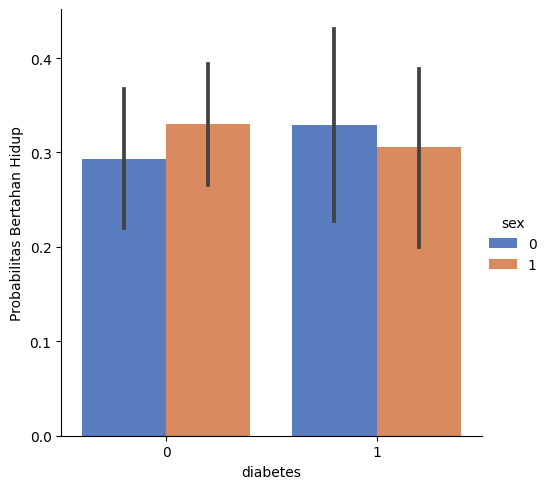

In [20]:
# Explore diabetes vs Survived by Sex
g = sns.catplot(x="diabetes", y="DEATH_EVENT", hue="sex", data=df,
                   kind="bar", palette="muted")
g.set_ylabels("Probabilitas Bertahan Hidup")

**High Blood Pressure**

Text(0, 0.5, 'Probabilitas Bertahan Hidup')

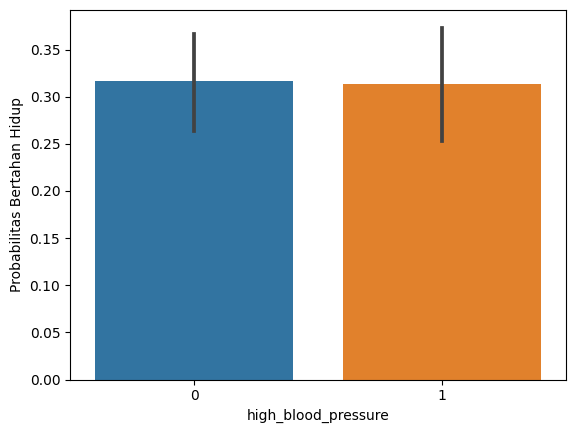

In [21]:
g = sns.barplot(x="high_blood_pressure",y="DEATH_EVENT",data=df)
g.set_ylabel("Probabilitas Bertahan Hidup")

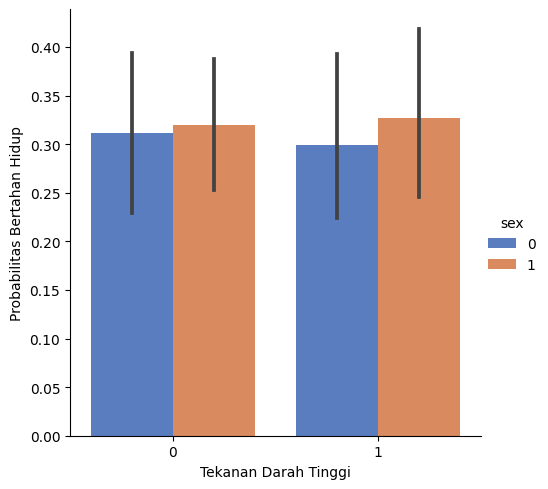

In [22]:
# Explore high_blood_pressure vs Survived by Sex
g = sns.catplot(x="high_blood_pressure", y="DEATH_EVENT", hue="sex", data=df,
                    kind="bar", palette="muted")
g.set_ylabels("Probabilitas Bertahan Hidup")
g.set_xlabels("Tekanan Darah Tinggi")

**Serum Sodium / Smoking**

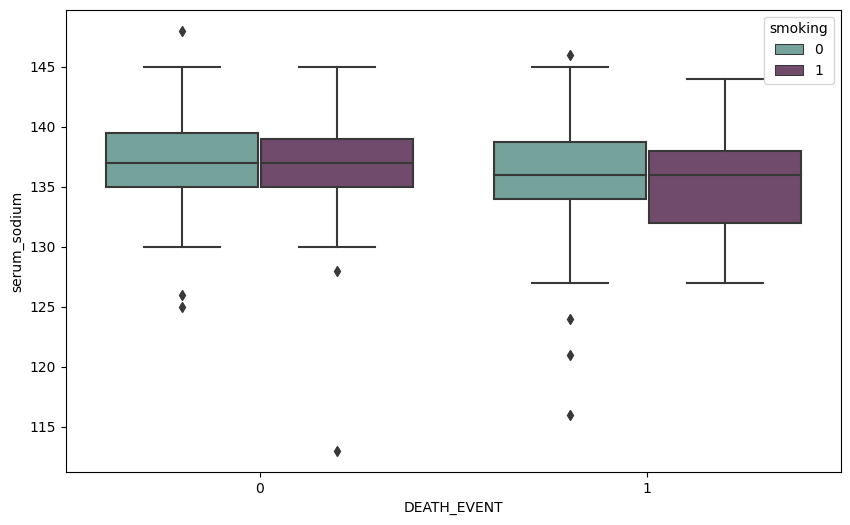

In [23]:
# Serum Sodium vs Death Event vs Smoking

plt.figure(figsize=(10,6))
sns.boxplot(x=df["DEATH_EVENT"], y=df['serum_sodium'], hue=df['smoking'], palette=["#6daa9f","#774571"])
plt.show()

Ada korelasi antara Smoking dan Sodium Serum. Dibandingkan dengan pengguna non-perokok, perokok mengalami peningkatan kadar sodium serum secara signifikan.


**Platelets vs Anemia vs Death Event**

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

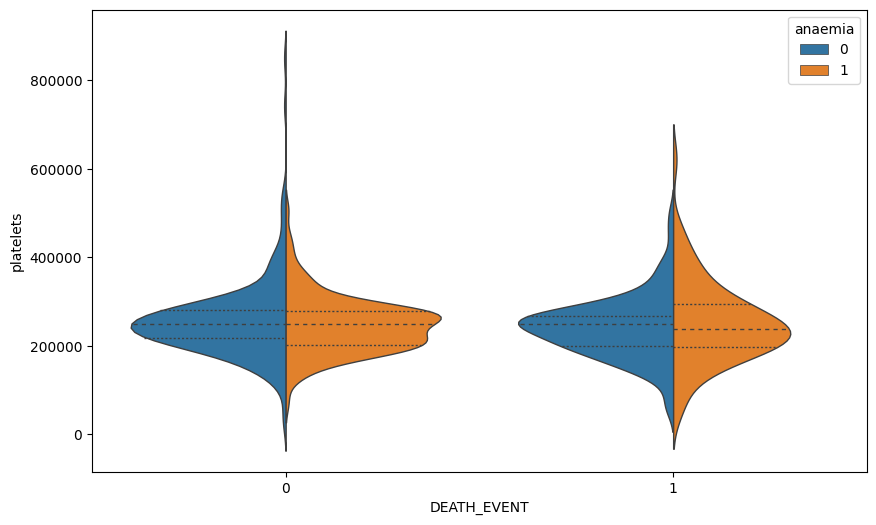

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="DEATH_EVENT", y="platelets", hue="anaemia",
               split=True, inner="quart", linewidth=1,
               )

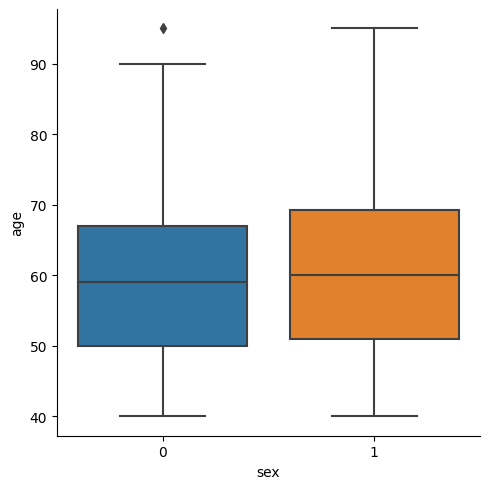

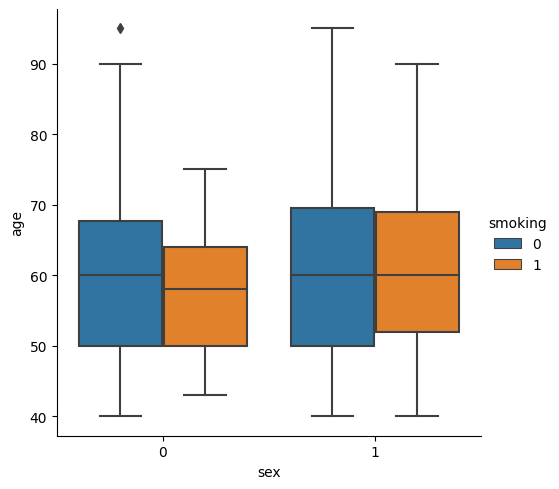

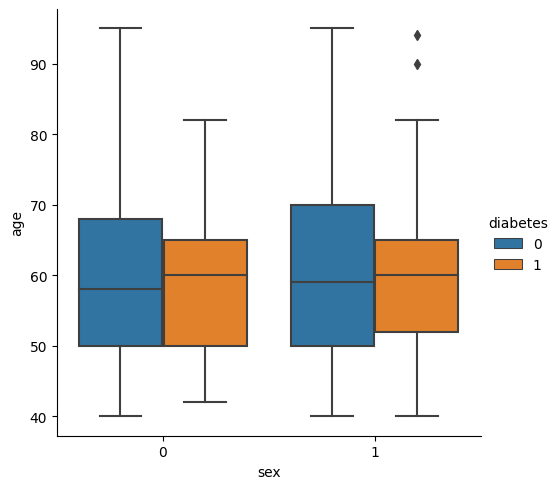

In [25]:
# Age vs Sex, Parch , Pclass and SibSP
sns.catplot(y="age",x="sex",data=df,kind="box")
sns.catplot(y="age",x="sex",hue="smoking", data=df,kind="box")
sns.catplot(y="age",x="sex",hue="diabetes", data=df,kind="box")

## Data vs DEATH_EVENT

In [26]:
anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

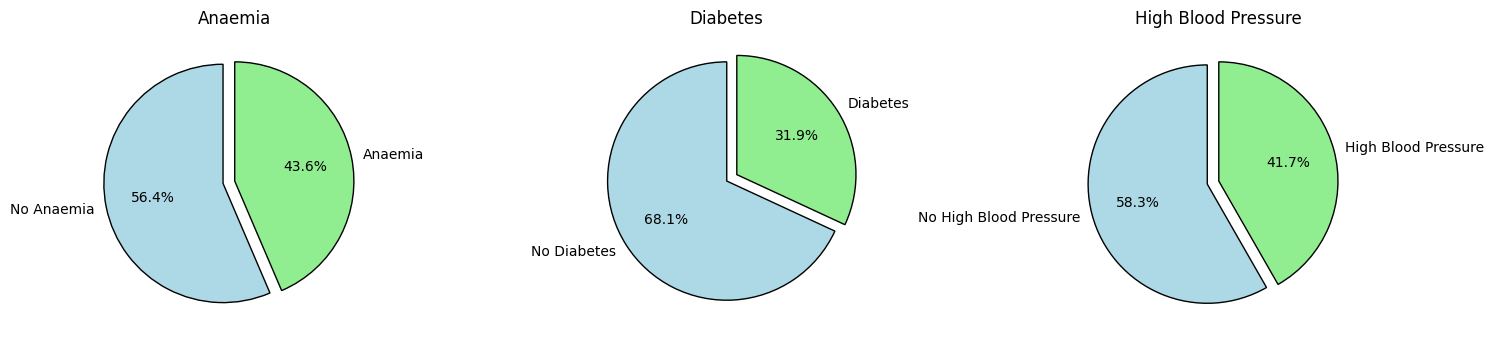

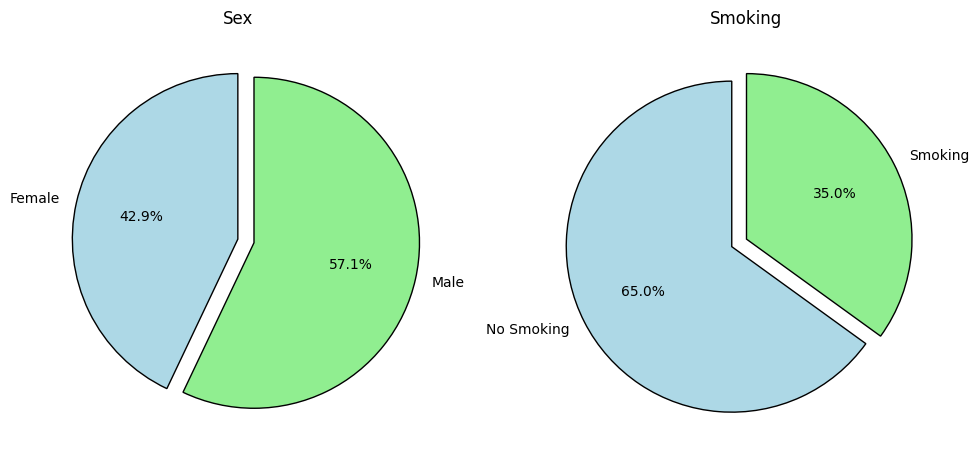

In [27]:
colors = ['lightblue', 'lightgreen']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting pie chart 'Anaemia'
ax[0].pie(anaemia, labels=['No Anaemia', 'Anaemia'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0].set_title('Anaemia')

# Plotting pie chart 'Diabetes'
ax[1].pie(diabetes, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1), colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1].set_title('Diabetes')

# Plotting pie chart 'High Blood Pressure'
ax[2].pie(hbp, labels=['No High Blood Pressure', 'High Blood Pressure'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[2].set_title('High Blood Pressure')

plt.tight_layout()
plt.show()

# Creating a 1x2 grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting pie chart 'Sex'
ax[0].pie(sex, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1), colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0].set_title('Sex')

# Plotting chart 'Smoking'
ax[1].pie(smoke, labels=['No Smoking', 'Smoking'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1].set_title('Smoking')

plt.tight_layout()
plt.show()


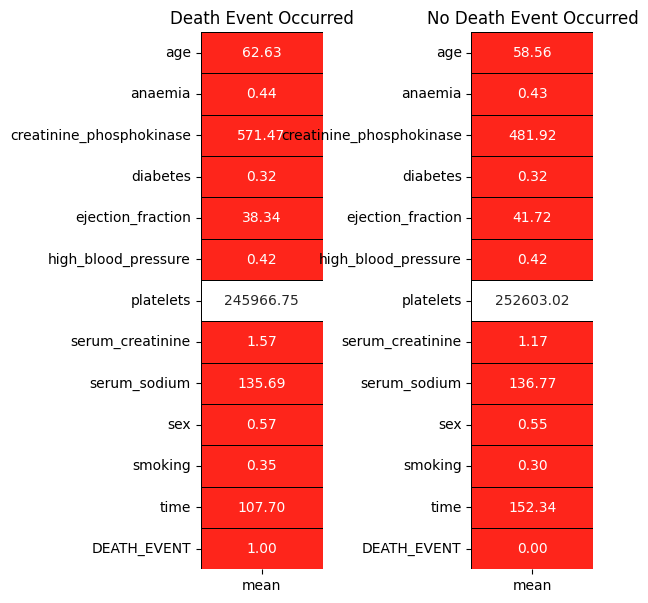

In [28]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

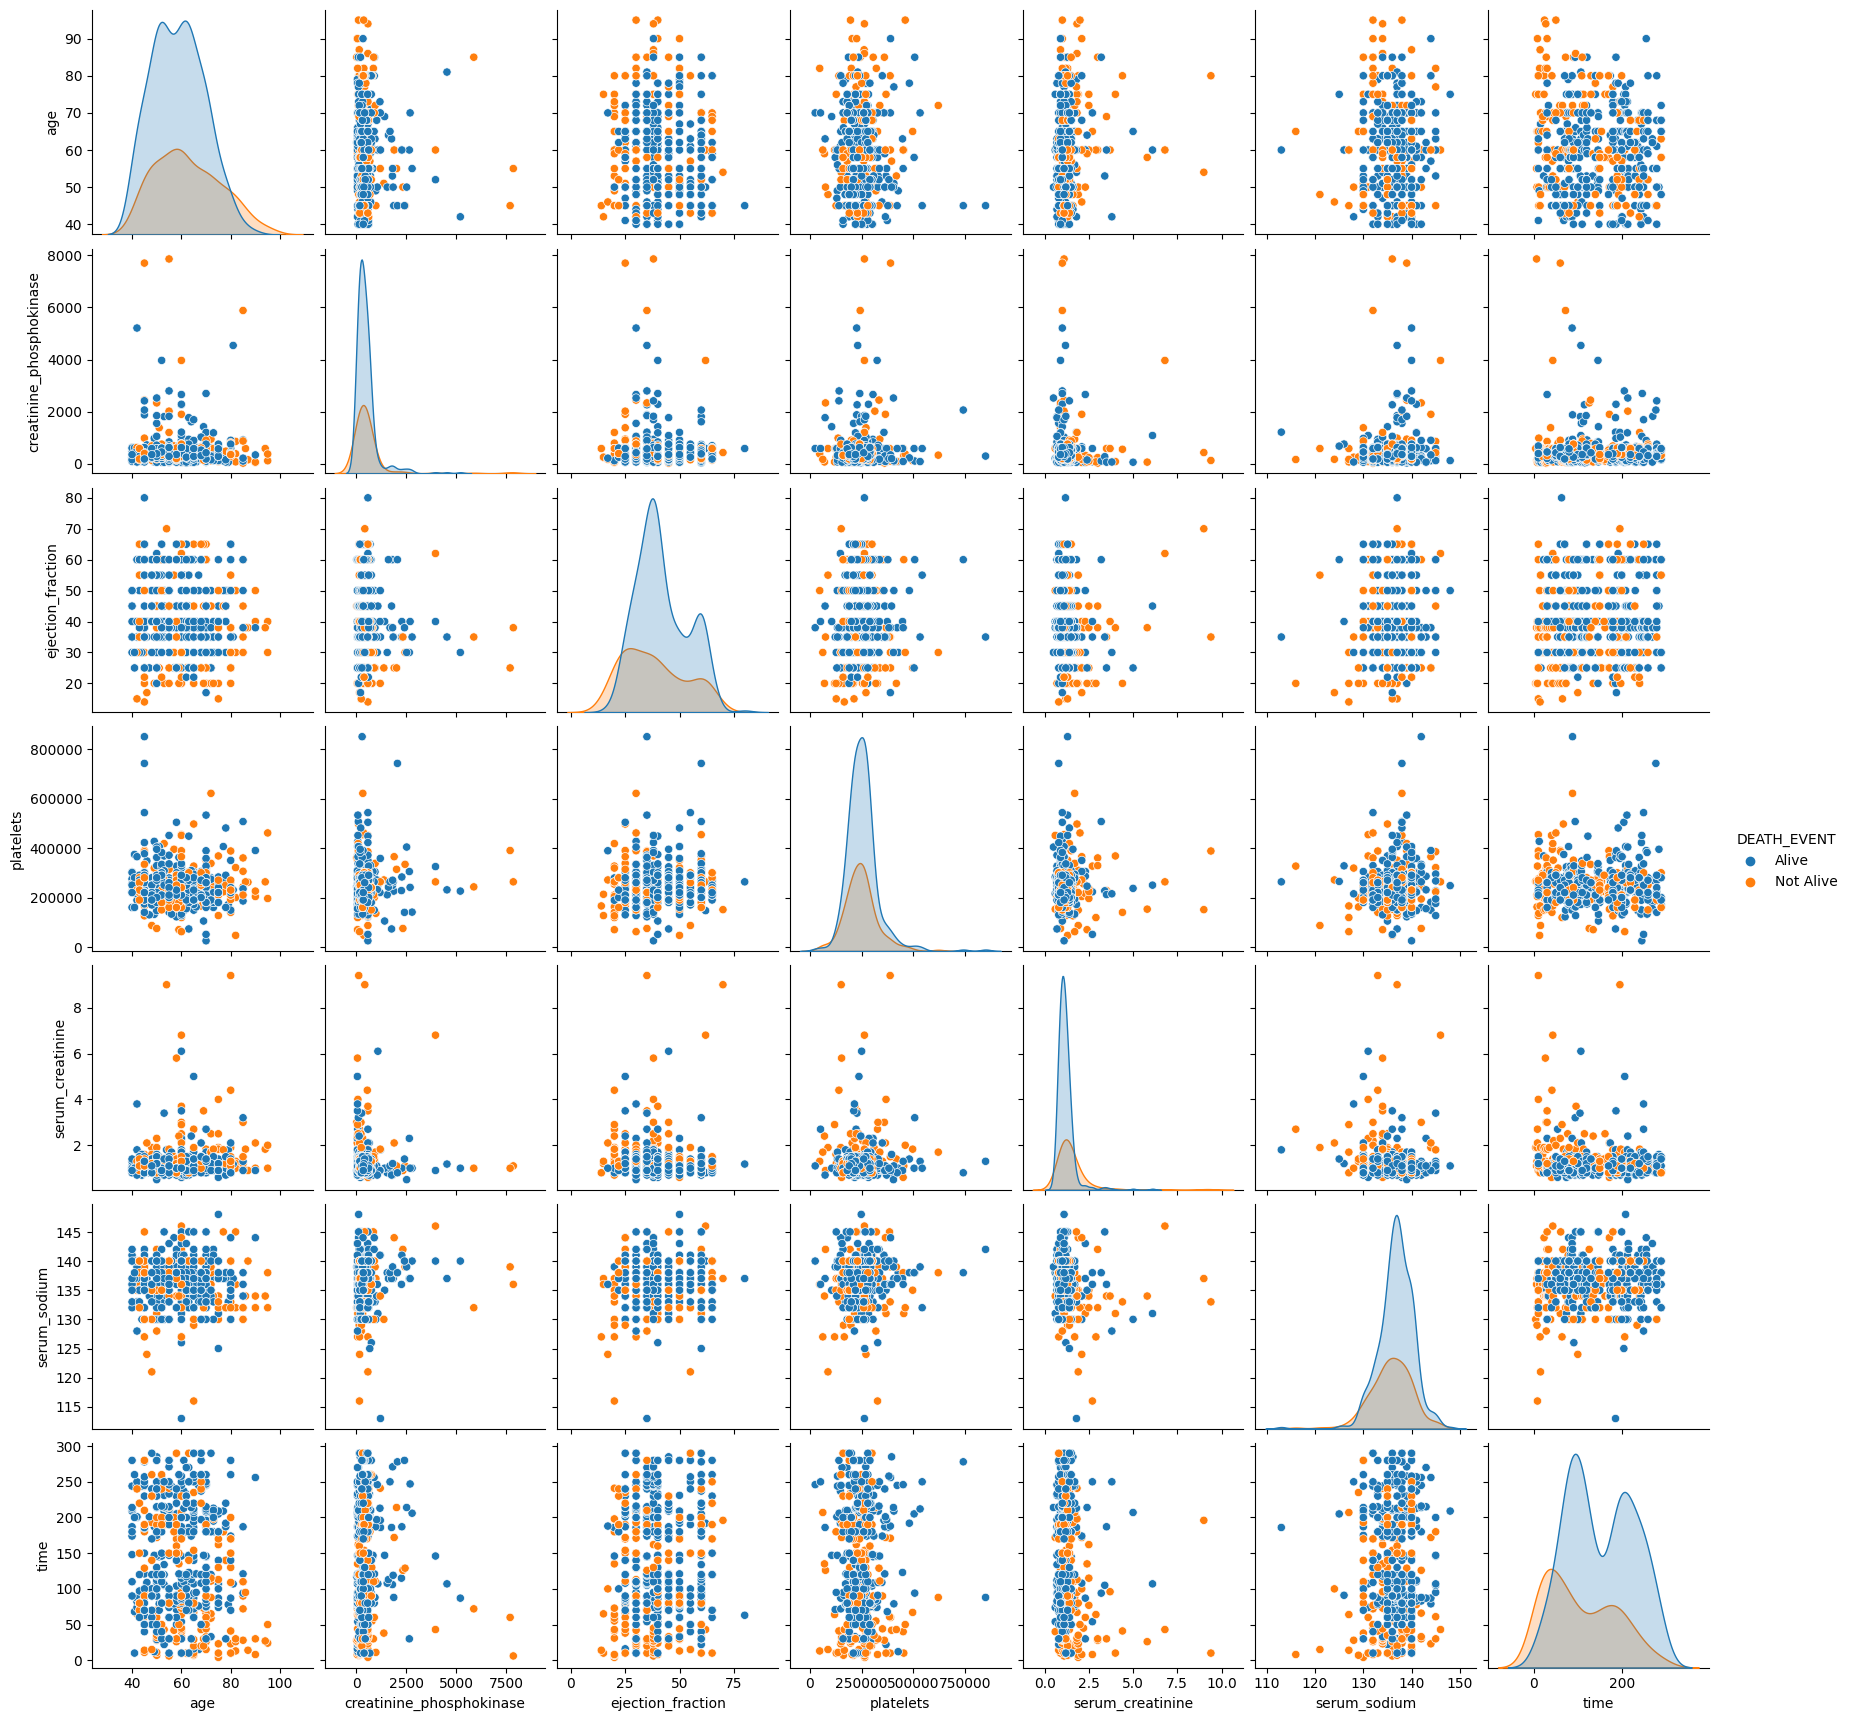

In [29]:
data = df.copy()
data.loc[data.DEATH_EVENT == 0, 'DEATH_EVENT'] = "Alive"
data.loc[data.DEATH_EVENT == 1, 'DEATH_EVENT'] = "Not Alive"
sns.pairplot(data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT');

# 5. Data Preparation

---



In [30]:
# Menghapus kolom time karena kurang kongkrit apabila digunakan dalam modeling

x = df.copy()
y = x.loc[:,["DEATH_EVENT"]]
x = x.drop(columns=['time','DEATH_EVENT'])
features_names = x.columns

In [31]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

## Mencari 5 data yang paling penting untuk dilanjutkan dalam proses analisis

Feature ranking:
1. feature 4 (0.154840)
2. feature 7 (0.145874)
3. feature 0 (0.143199)
4. feature 8 (0.126623)
5. feature 6 (0.119748)
6. feature 2 (0.115449)
7. feature 1 (0.043061)
8. feature 3 (0.042941)
9. feature 5 (0.042392)
10. feature 9 (0.037716)
11. feature 10 (0.028156)


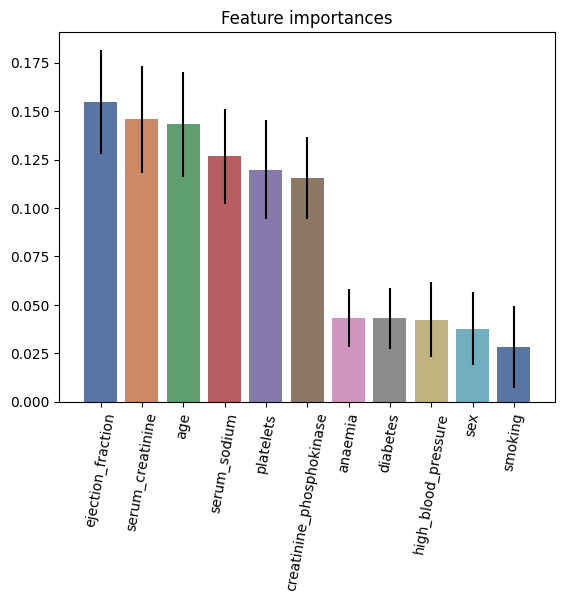

In [32]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print Peringkat
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting
plt.figure()
plt.title("Feature importances")
sns.barplot(x=features_names[indices].to_numpy(), y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(x.shape[1]), features_names[indices].to_numpy(),rotation=80)
plt.xlim([-1, x.shape[1]])
plt.show()

## Correlation Map 5 data diatas

In [33]:
features = features_names[indices].to_numpy()[0:6]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="DEATH_EVENT"
)
fig.update_traces(diagonal_visible=False)

fig.update_layout(
    title='Correlation map on best first 5 features',
    dragmode='select',
    width=1200,
    height=1200,
    #hovermode='closest',
)
fig.show()

In [34]:
def plot_cm(cm,title):
    z = cm
    x = ['No death Event', 'Death Event']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.10,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.15,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=20),width=750,height=750)

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

## Data Splitting


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [36]:
# Pisahkan train dataset and test dataset
features = df.drop(["DEATH_EVENT"], axis=1)
labels = df["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

## Cross Validate Models


Membandingkan 7 model klasifikasi paling populer dan mengevaluasi akurasi rata-rata dengan prosedur validasi kfold cross

* Logistic regression
* Decision Tree
* AdaBoost
* SVC
* Random Forest
* Gradient Boosting
* KNeighbors




In [37]:
def evaluate_model(models):
    """
    Mengambil daftar model dan mengembalikan bagan skor validasi silang menggunakan akurasi rata-rata
    """

    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)

    result = []
    for model in models :
        result.append(cross_val_score(model, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.70,0.07,LogisticRegression
1,0.67,0.07,DecisionTreeClassifier
2,0.66,0.08,AdaBoostClassifier
3,0.68,0.01,SVC
4,0.78,0.05,RandomForestClassifier
5,0.78,0.08,GradientBoostingClassifier
6,0.60,0.05,KNeighborsClassifier


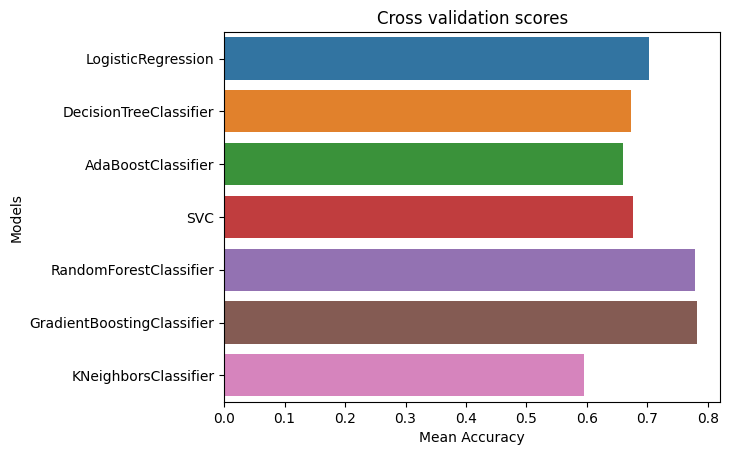

In [38]:
# Modeling step Test differents algorithms
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

Berdasarkan skor diatas, akan dicoba untuk menggunakan pengklasifikasi LogisticRegression, DecisionTree, Random Forest, AdaBoost, dan SVC.

# 6. Modeling

---



Menggunakan Algoritma berikut untuk memprediksi DEATH_EVENT

* LogisticRegression
* DecisionTree
* Random Forest
* AdaBoost
* SVC


In [39]:
models= [['Logistic Regression ',LogisticRegression()],
        ['Decision Tree Classifier ',DecisionTreeClassifier()],
        ['Random Forest Classifier ',RandomForestClassifier()],
        ['Ada Boost ',AdaBoostClassifier()],
        ['SVM ',SVC()]]


models_score = []
for name,model in models:

    model = model
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    cm_model = confusion_matrix(y_test, model_pred)
    models_score.append(accuracy_score(y_test,model.predict(x_test)))

    print(name)
    print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
    print('############################################')
    plot_cm(cm_model,title=name+"model")
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)

    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

Logistic Regression 
Validation Acuuracy:  0.7692307692307693
Training Accuracy:  0.7313019390581718
############################################


Decision Tree Classifier 
Validation Acuuracy:  0.6858974358974359
Training Accuracy:  1.0
############################################


Random Forest Classifier 
Validation Acuuracy:  0.782051282051282
Training Accuracy:  1.0
############################################


Ada Boost 
Validation Acuuracy:  0.7371794871794872
Training Accuracy:  0.8448753462603878
############################################


SVM 
Validation Acuuracy:  0.7051282051282052
Training Accuracy:  0.6759002770083102
############################################


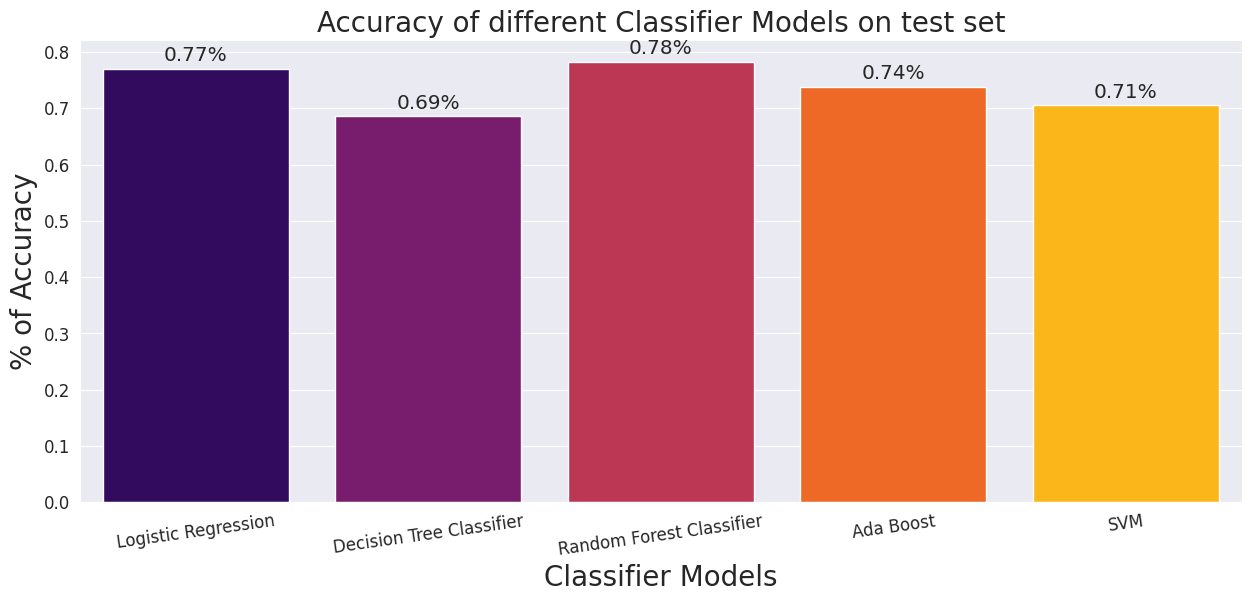

In [40]:
models_names = [
    'Logistic Regression',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Ada Boost',
    'SVM']

plt.rcParams['figure.figsize']=15,6
sns.set_style('darkgrid')
ax = sns.barplot(x=models_names, y=models_score, palette = "inferno", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()